In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

1. Analyse du dataset :

1.1 Quantité

In [42]:
from matplotlib import pyplot as plt

# import du dataset
digits = datasets.load_digits()

# Affiche le nombre d'image et leur format
print("Image Data Shape" , digits.data.shape)

# Affiche le nombre de label
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Notre dataset est composé de 1797 images labellisées.

[Text(0.5, 0, 'n° labellisé'), Text(0, 0.5, 'Occurrence')]

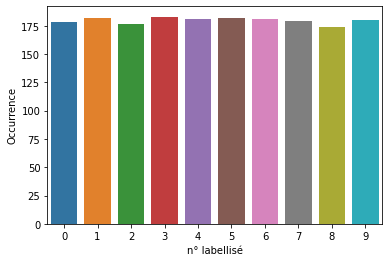

In [43]:
graphique = sns.countplot(x=digits.target)
graphique.set(xlabel="n° labellisé", ylabel = "Occurrence")

Les données labellisées sont équitablement distribuées (environ 175 par label)

1.2 Représentation des données

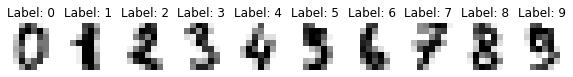

In [44]:
# création de 10 figures de 10 par 3 pixels
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))

# Pour chaque figure, on affiche l'image du chiffre et son label en titre
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

Format des images :

In [45]:
# Affiche le tableau représentant la première image
print(digits.images[0])
print("\n Type de chaque valeur :", type(digits.images[0][0][0]))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 Type de chaque valeur : <class 'numpy.float64'>


Chaque image est un tableau de 8x8 pixels en niveaux de gris.
Chaque pixel de l'image est représenté par un float ayant une valeur entre 0 et 15.
Afin d'être exploitable par notre modèle, il est nécessaire de redimensionner ce tableau en un vecteur :

In [46]:
# Redimensionne le tableau en vecteur
print(digits.images[0].reshape(-1))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV


x = digits.images.reshape((len(digits.images), -1))
y = digits.target

# séparation du dataset en données "d'apprentissage" et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)

lRModel = LogisticRegression(verbose=False, max_iter=10000)

# dictionaire contenant les différents paramètres à essayer
paramDict = dict()
paramDict['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
paramDict['penalty'] = ['l2', 'none']
paramDict['C'] = [5, 10]

kFold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

model_cv = GridSearchCV(estimator = lRModel,
                        param_grid = paramDict,
                        scoring= 'accuracy',
                        cv = kFold,
                        verbose = 1,
                        return_train_score=True)
model_cv.fit(x_train, y_train)
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 30 folds for each of 12 candidates, totalling 360 fits


C:\Users\Paul\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Paul\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Paul\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Paul\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Paul\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore th

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,0.467445,0.070265,0.000234,0.000423,5,l2,newton-cg,"{'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}",0.977778,0.966667,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
1,1.719068,0.657237,0.000200,0.000400,5,l2,lbfgs,"{'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}",0.977778,0.966667,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
2,0.046261,0.001450,0.000234,0.000424,5,l2,liblinear,"{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}",0.933333,0.966667,...,1.0,1.0,1.0,1.0,0.998762,1.0,1.0,1.0,0.999917,0.000309
3,0.099719,0.009651,0.000234,0.000423,5,none,newton-cg,"{'C': 5, 'penalty': 'none', 'solver': 'newton-...",0.955556,0.955556,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
4,0.034232,0.001778,0.000211,0.000391,5,none,lbfgs,"{'C': 5, 'penalty': 'none', 'solver': 'lbfgs'}",0.944444,0.977778,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
5,0.000100,0.000300,0.000000,0.000000,5,none,liblinear,"{'C': 5, 'penalty': 'none', 'solver': 'libline...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.477210,0.050480,0.000233,0.000423,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.977778,0.966667,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
7,1.908055,0.761847,0.000233,0.000423,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.977778,0.966667,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
8,0.052696,0.004814,0.000218,0.000403,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.933333,0.966667,...,1.0,1.0,1.0,1.0,0.998762,1.0,1.0,1.0,0.999959,0.000222
9,0.095332,0.003710,0.000363,0.000477,10,none,newton-cg,"{'C': 10, 'penalty': 'none', 'solver': 'newton...",0.955556,0.955556,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
